In [32]:
# !pip install imblearn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore") 

In [33]:
#Read a pickle file and load the data
import pickle
with open('final_df.pkl', 'rb') as file:
    final_df = pickle.load(file)

In [34]:
df = final_df
df = df.drop(['id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
df['diagnosis'].value_counts()

0.0    357
1.0    212
Name: diagnosis, dtype: int64

In [36]:
ratio=212/(212+357)
ratio

0.37258347978910367

<Axes: xlabel='diagnosis', ylabel='count'>

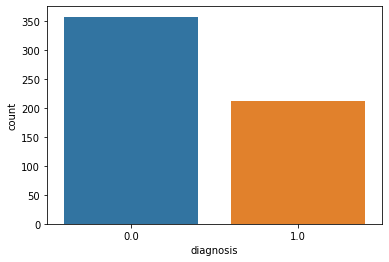

In [37]:
sns.countplot(x='diagnosis', data=df)

In [38]:
# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1), df['diagnosis'], test_size=0.2, random_state=42)

In [41]:
# Define the classification metrics function
def classificationMetrics(y, yhat):
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    return metrics

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
classificationMetrics(y_test, y_pred)

Accuracy: 95.61%


{'Accuracy': 0.956140350877193,
 'Precision': 0.975,
 'Recall': 0.9069767441860465,
 'F1-Score': 0.9397590361445783}

In [43]:
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 4, 39]])

In [44]:
# Imbalanced techniques

In [45]:
techniques = {
    "ROS": RandomOverSampler(random_state=47),
    "RUS": RandomUnderSampler(random_state=47),
    "SMOTE": SMOTE(random_state=47),
    "SMOTETomek": SMOTETomek(random_state=47)
}

In [46]:
# Evaluate and collect results using list comprehension
results = [
    {
        "Technique": name,
        "Accuracy": accuracy_score(y_test, model.predict(X_test)),
        "Precision": precision_score(y_test, model.predict(X_test)),
        "Recall": recall_score(y_test, model.predict(X_test)),
        "F1-Score": f1_score(y_test, model.predict(X_test))
    }
    for name, technique in techniques.items()
    for model in [LogisticRegression(random_state=42).fit(*technique.fit_resample(X_train, y_train))]
]
# Display results
results_df = pd.DataFrame(results)
print(results_df)

    Technique  Accuracy  Precision    Recall  F1-Score
0         ROS  0.964912   0.975610  0.930233  0.952381
1         RUS  0.982456   0.976744  0.976744  0.976744
2       SMOTE  0.956140   0.975000  0.906977  0.939759
3  SMOTETomek  0.964912   0.975610  0.930233  0.952381


In [47]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Technique,Accuracy,Precision,Recall,F1-Score
0,ROS,0.964912,0.975610,0.930233,0.952381
1,RUS,0.982456,0.976744,0.976744,0.976744
2,SMOTE,0.956140,0.975000,0.906977,0.939759
3,SMOTETomek,0.964912,0.975610,0.930233,0.952381


In [48]:
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 4, 39]])

In [49]:
## We choose the techniques with the most optimal results
## This is in class exmaple, but it seams that ROS is better
## Synthetic Minority Over-sampling Technique (SMOTE)

In [50]:
smote = SMOTE()

In [51]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)
model.fit(X_smote,y_smote)
confusion_matrix(y_test,y_pred)
pred_smote = model.predict(X_test)
confusion_matrix
(y_test,pred_smote)

(204    0.0
 70     1.0
 131    1.0
 431    0.0
 540    0.0
       ... 
 486    0.0
 75     1.0
 249    0.0
 238    0.0
 265    1.0
 Name: diagnosis, Length: 114, dtype: float64,
 array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.]))

<Axes: xlabel='label', ylabel='count'>

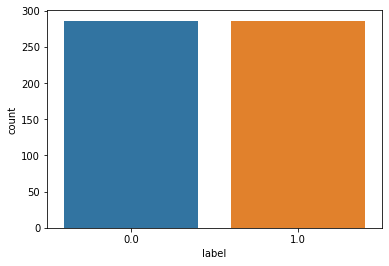

In [52]:
df_smote = pd.DataFrame({'label': y_smote})
sns.countplot(x='label', data=df_smote)

In [53]:
df_smote.value_counts()

label
0.0      286
1.0      286
dtype: int64